# Assignment-04-Simple Linear Regression-2

1) Delivery_time $\rightarrow$ Predict delivery time using sorting time 
2) Salary_hike $\rightarrow$ Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


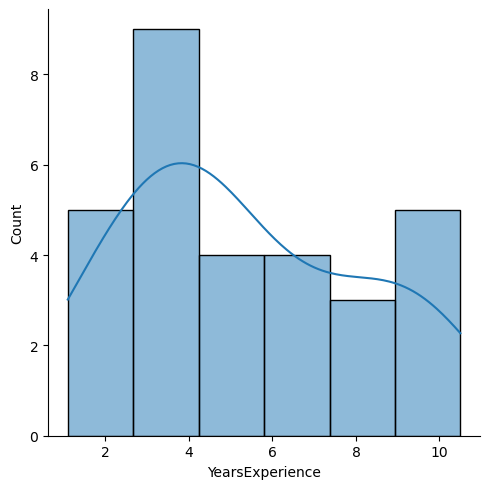

In [4]:
sns.displot(dataset['YearsExperience'], kind="hist", kde=True,)

<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

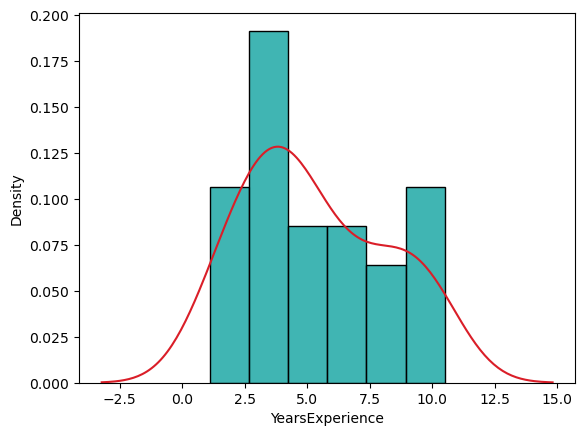

In [5]:
sns.histplot(dataset['YearsExperience'], stat="density", fill=True, color ='#009d9a') 
sns.kdeplot(dataset['YearsExperience'], color="#da1e28")

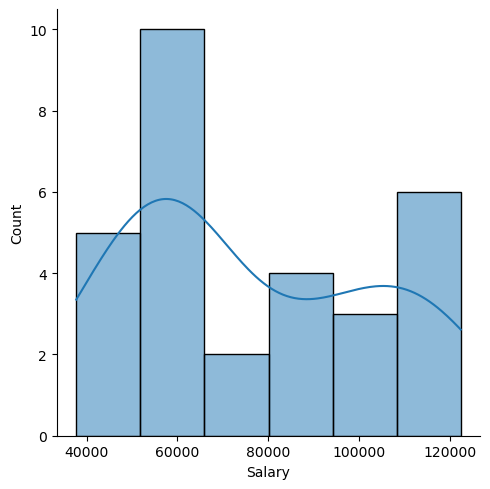

In [6]:
sns.displot(dataset['Salary'], kind="hist", kde=True,)

<AxesSubplot: xlabel='Salary', ylabel='Density'>

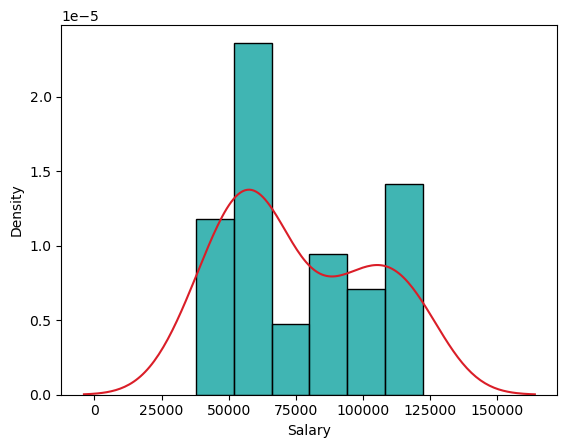

In [7]:
sns.histplot(dataset['Salary'], stat="density", fill=True, color ='#009d9a') 
sns.kdeplot(dataset['Salary'], color="#da1e28")

## Correlation Analysis

In [8]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

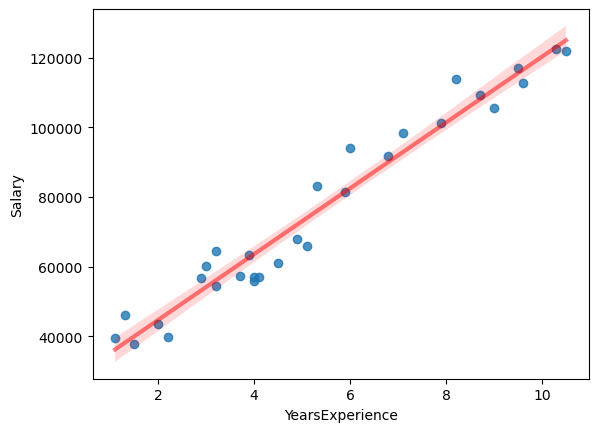

In [9]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'], line_kws={"color":"r","alpha":0.5,"lw":3} )

## Model Building

In [10]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

## Model Testing

In [11]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [13]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Predictions

In [14]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

# Automatic Prediction for Sample value of  Years Experience 

**As we are using a linear model to predict the results there is no upper limit for the year values but in 
real life senario there is a ristriction for the values.**

In [15]:
new_data=pd.Series([3,5,11,109])
new_data

0      3
1      5
2     11
3    109
dtype: int64

In [16]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5
2,11
3,109


In [17]:
model.predict(data_pred)

0    5.414209e+04
1    7.304201e+04
2    1.297418e+05
3    1.055838e+06
dtype: float64

**Our Model gives a prediction for 109 years of experiance but in reality no one lives that long or atleast not that long by doing a job.**